# Инфраструктура Python. Машинное обучение

Машинное обучение это построение по достаточно большому набору данных $(X, y)_{i=1}^n$ интерполяционной функции из некоторого достаточно богатого пространства, такой что $y \approx F(X)$. Это, например, часто позволяет «предсказывать» значение неизвестной, но полезной взаимосвязи для никогда не наблюдавшегося образца, скажем, распознать речь на впервые встреченном аудио в текст, после тренировки на большом массиве распознанных людьми аудиозаписей.

В машинном обучении выделяют:

* задачу классификации — $y$ это некоторые категории, часто две, например, «болен» или «здоров», а $X$ данные медобследований
* задачу регрессии — $y$ это некоторое вещественное число, например «цена», а $X$ характеристики домов
* задачу кластеризации — unsupervised машинное обучение, $y$ неизвестны, но $X$ с одинаковыми $y$ в каком-то смысле близки. Мы можем сгруппировать похожие рукописные символы на чужом языке, даже если не знаем, какие символы подразумевались
* поиск аномалий — $y$ неизвестны, но мы хотим опознавать, когда $X$ непохоже на все, виденное ранее, например, если система с многочисленными датчиками впервые начала разваливаться
* снижение размерности — $y$ неизвестны, имеют значительно меньшую размерность, чем $X$, но тем не менее отображают значительную часть взаимосвязей в исходном $X$. Например, вектор координат помеченных точек лица имеет размерность порядка тысяч, но может быть сжат до 12 координат так, что по ним можно восстановить лицо с хорошей точностью.

Основной библиотекой машинного обучения в Python является `sklearn` (она же `scikit-learn`, входит в Anaconda). Для большинства задач она предполагает, что `X` это векторы фич, записанные построчно, а `y` вектор предсказываемых величин.

## Пример задачи машинного обучения

Чаще всего в решении задачи классификации исследователь:
* чистит, преобразовывает данные, добавляет ручками фичи
* разбивает данные с известными ответами (обычно несколькими способами) на train и test подвыборку — кроссвалидация
* на train выборке тренирует (`fit`) некоторый классификатор с некоторым набором гиперпараметров
* на test выборке предсказывает (`predict`) ответы натренированным классификатором
* сравнивает вычисленные и известные заранее ответы некоторой функцией качества, усредняя ее по разбиениям на train/test.
* ориентируясь на функцию качества, меняет входные данные, кроссвалидацию, классификатор или гиперпараметры

В нарративах IPython важно, чтобы при перезапуске кода из нотебука получался тот же результат. Для этого в большинстве алгоритмов библиотек машинного обучения доступен параметр вроде `random_state` или `seed`, для того, чтобы выдача ГСЧ совпадала между запусками.

Библиотека `sklearn` содержит несколько небольших датасетов, которые можно использовать как образцы, например, небольшой датасет про вино: 178 образцов, 13 численных атрибутов для каждого, один из трех классов.

In [12]:
import sklearn.datasets

dataset = sklearn.datasets.load_wine()
print dataset['feature_names']
print dataset['data']
print dataset['target']

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[[  1.42300000e+01   1.71000000e+00   2.43000000e+00 ...,   1.04000000e+00
    3.92000000e+00   1.06500000e+03]
 [  1.32000000e+01   1.78000000e+00   2.14000000e+00 ...,   1.05000000e+00
    3.40000000e+00   1.05000000e+03]
 [  1.31600000e+01   2.36000000e+00   2.67000000e+00 ...,   1.03000000e+00
    3.17000000e+00   1.18500000e+03]
 ..., 
 [  1.32700000e+01   4.28000000e+00   2.26000000e+00 ...,   5.90000000e-01
    1.56000000e+00   8.35000000e+02]
 [  1.31700000e+01   2.59000000e+00   2.37000000e+00 ...,   6.00000000e-01
    1.62000000e+00   8.40000000e+02]
 [  1.41300000e+01   4.10000000e+00   2.74000000e+00 ...,   6.10000000e-01
    1.60000000e+00   5.60000000e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


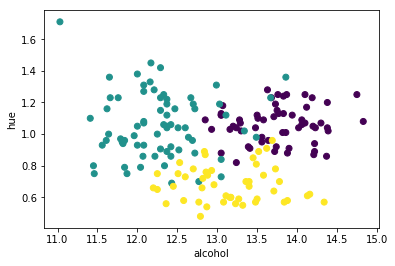

In [17]:
xlabel('alcohol')
ylabel('hue')
scatter(
    dataset['data'][:, dataset['feature_names'].index('alcohol')],
    dataset['data'][:, dataset['feature_names'].index('hue')],
    c=dataset['target']
);

Фичи в 2D numpy-массиве, предсказываемая переменная в 1D.

In [28]:
X = dataset['data']
Y = dataset['target']
print X.shape, Y.shape

(178L, 13L) (178L,)


Разбиение данных на 3 примерно равных куска (fold) (на 2 тренируем, на 1 предсказываем), с примерно исходными долями классов (stratified), с перемешиванием

In [13]:
import sklearn.model_selection
import sklearn.ensemble

In [14]:
cv = sklearn.model_selection.StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

В качестве классификатора — простой и безотказный случайный лес на 100 деревьях

In [15]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

In [18]:
for train, test in cv.split(X, Y):
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]
    rf.fit(X_train, Y_train)
    Y_pred_proba = rf.predict_proba(X_test)
    Y_pred = rf.predict(X_test)
    print sklearn.metrics.accuracy_score(Y_test, Y_pred)

0.966666666667
0.983333333333
0.98275862069


Этот цикл по разбиениям кроссвалидации, с `fit`, `predict`, функцией качества можно записать в одну строчку

In [11]:
qs = sklearn.model_selection.cross_val_score(rf, X, Y, scoring='accuracy', cv=cv)
print qs
print mean(qs), '±', std(qs)

[ 0.96666667  0.98333333  0.98275862]
0.977586206897 ± 0.00772484488646


Натренированный случайный лес считает статистику о том, по какому признаку чаще всего ветвились деревья, что довольно неплохо соответствует тому, какие признаки важны, а какие нет.

In [15]:
sorted(zip(rf.feature_importances_, dataset['feature_names']), reverse=True)

[(0.17702664133632834, 'flavanoids'),
 (0.16999140023532355, 'alcohol'),
 (0.15491658127652433, 'proline'),
 (0.13544688063922203, 'color_intensity'),
 (0.094188110714468781, 'od280/od315_of_diluted_wines'),
 (0.068970267741025562, 'total_phenols'),
 (0.06553220208373757, 'hue'),
 (0.045178197289937883, 'malic_acid'),
 (0.028022264615764483, 'magnesium'),
 (0.016848326507225814, 'nonflavanoid_phenols'),
 (0.016296799390085048, 'ash'),
 (0.015298515457697821, 'proanthocyanins'),
 (0.012283812712658942, 'alcalinity_of_ash')]

In [52]:
sklearn.metrics.confusion_matrix(Y, sklearn.model_selection.cross_val_predict(rf, X, Y, cv=cv))

array([[58,  1,  0],
       [ 1, 68,  2],
       [ 0,  0, 48]], dtype=int64)

Видно, что всего 4 образца были классифицированы неправильно

## Датасеты

todo
* import skdata.iris.view
* from mnist import load_dataset
* datasets (fetch_mldata, fetch_olivetti_faces, load_boston, load_digits, load_iris, make_classification, make_blobs)

## Подготовка данных

Данные можно шкалировать (линейно [min(x), max(x)] &rarr; [0, 1]), стандартизовать (линейно $\bar{x} \rightarrow 0$, $\bar{x} + \sigma \rightarrow 1$) или нормализовать (построчно! $\vec{v} \rightarrow \frac{\vec{v}}{\|\vec{v}\|}$).

In [131]:
import sklearn.preprocessing
data = array([[1, 2, 3, 4], [4, 5, 7, 7], [1, 1, 1, 1]], dtype=float)
print data
print
print sklearn.preprocessing.MinMaxScaler().fit_transform(data)
print sklearn.preprocessing.scale(data)
print sklearn.preprocessing.normalize(data)

[[ 1.  2.  3.  4.]
 [ 4.  5.  7.  7.]
 [ 1.  1.  1.  1.]]

[[ 0.          0.25        0.33333333  0.5       ]
 [ 1.          1.          1.          1.        ]
 [ 0.          0.          0.          0.        ]]
[[-0.70710678 -0.39223227 -0.26726124  0.        ]
 [ 1.41421356  1.37281295  1.33630621  1.22474487]
 [-0.70710678 -0.98058068 -1.06904497 -1.22474487]]
[[ 0.18257419  0.36514837  0.54772256  0.73029674]
 [ 0.33927557  0.42409446  0.59373225  0.59373225]
 [ 0.5         0.5         0.5         0.5       ]]


## Подготовка данных
todo
* preprocessing (Imputer, StandardScaler, scale, normalize/Normalizer, Binarizer, MinMaxScaler, LabelEncoder, PolynomialFeatures)

## Извлечение фич
todo
* feature_extraction.text (CountVectorizer)
* nltk & K

## Кроссвалидация

Зачем нужна странная схема (кроссвалидация): тренировать на одном поднаборе данных, а предсказывать результат на другом? Проблема в том, что чем сложнее классификатор, чем больше разных функций он может представить, тем проще ему просто запомнить тренировочную выборку, а не улавливать какие-то закономерности в аппроксимируемой функции. В таком случае качество на train растет, а на test с какого-то момента (при итеративном построении классификатора) начинает падать. Это явление называется переобучение.

todo bias+variance+noise

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

In [2]:
import sklearn.model_selection

Основной рабочей лошадкой в кроссвалидации является `KFold`, схема при которой данные разбиваются на `n_splits` примерно равных частей, в качестве test берется одна часть, в качестве train остальные, и так `n_splits` раз. Объекты кроссвалидации из `sklearn` выдают пары массивов индексов `train`, `test` генератором `.split(X[, Y])`.

In [31]:
cv = sklearn.model_selection.KFold(n_splits=3)
X_10 = random.random((10, 3))
for train, test in cv.split(X_10):
    print train, test

[4 5 6 7 8 9] [0 1 2 3]
[0 1 2 3 7 8 9] [4 5 6]
[0 1 2 3 4 5 6] [7 8 9]


Почти всегда `KFold` используется с `shuffle=True` и установленным `random_state`, чтобы объекты в части брались вперемешку, а не подряд.

In [32]:
cv = sklearn.model_selection.KFold(n_splits=3, shuffle=True, random_state=0)
for train, test in cv.split(X_10):
    print train, test

[0 1 3 5 6 7] [2 4 8 9]
[0 2 3 4 5 8 9] [1 6 7]
[1 2 4 6 7 8 9] [0 3 5]


Если на некоторый важный класс приходится не так много примеров (если классов много или мало данных), то стоит использовать `StratifiedKFold`, который пытается разбивать выборку так, чтобы объекты всех классов были представлены более-менее равномерно.

Процедуру `KFold` (или `StratifiedKFold`) можно повторять для уменьшения вероятности неожиданностей много (`n_repeats`) раз, используя `RepeatedKFold` (или `RepeatedStratifiedKFold`).

Другая популярная стратегия — разбивать выборку в определенном соотношении на две части `n_split` раз, она реализована в `ShuffleSplit` (+`StratifiedShuffleSplit`).

In [45]:
cv = sklearn.model_selection.ShuffleSplit(n_splits=4, test_size=0.4, random_state=0)
for train, test in cv.split(X_10):
    print train, test

[1 6 7 3 0 5] [2 8 4 9]
[9 8 0 6 7 4] [3 5 1 2]
[5 1 0 6 9 7] [2 3 8 4]
[7 5 8 0 3 4] [6 1 9 2]


Для предсказания временных рядов используют `TimeSeriesSplit`, при этом объекты должны быть упорядочены по времени. Ряд бьется на `n_splits+1` часть (первая может быть длиннее за счет остатка), затем `n_splits` раз в качестве test выборки берется i+1-й фолд, а в качестве train все до нее.

In [54]:
cv = sklearn.model_selection.TimeSeriesSplit(n_splits=3)
for train, test in cv.split(range(16)):
    print train, test

[0 1 2 3] [4 5 6 7]
[0 1 2 3 4 5 6 7] [ 8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11] [12 13 14 15]


Цикл `for train, test in cv.split(X, Y)` можно не писать самостоятельно, используя функции-обертки `cross_val_predict` для получения предсказаний классификатора на test-фолдах (расставляемых в соответствии с порядком объектов в `X`), и `cross_val_score` для их качества.

In [57]:
cv = sklearn.model_selection.KFold(n_splits=4, shuffle=True, random_state=0)

In [61]:
sklearn.model_selection.cross_val_predict(rf, X, Y, cv=cv)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Вызов с параметром `method='predict_proba'` вернет 2D массив предсказаний `[№ объекта, № класса] = вероятность`.

In [59]:
sklearn.model_selection.cross_val_score(rf, X, Y, scoring='neg_log_loss', cv=cv)

array([-0.12676593, -0.22558422, -0.09682255, -0.12924299])

## Качество классификации

Посмотреть на сводную табличку истина—предсказание можно с помощью матрицы конфуза

In [73]:
Y_true = [0,0,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1,1]
Y_pred = [0,0,0,0,0,0,0,0,1,1, 1,1,1,1,1,1,1,1,1,0]

In [74]:
sklearn.metrics.confusion_matrix(Y_true, Y_pred)

array([[8, 2],
       [1, 9]], dtype=int64)

In [76]:
print sklearn.metrics.classification_report(Y_true, Y_pred)

             precision    recall  f1-score   support

          0       0.89      0.80      0.84        10
          1       0.82      0.90      0.86        10

avg / total       0.85      0.85      0.85        20



Чтобы оценивать предсказания классификаторов относительно реальных классов объектов, `sklearn` предлагает ряд полезных вещественных метрик. Наиболее очевидная из них — `accuracy_score`, доля совпавших классов. Первым аргументом метрики принимают истинные классы, вторым предсказанные.

In [77]:
sklearn.metrics.accuracy_score(Y_true, Y_pred)

0.84999999999999998

Например, в медицине часто встречается задача классификации на два класса, где «положительный» класс редок (пациент болен греговирусом), но заметно важнее не пропустить больного, чем лишний раз не обследовать здорового. В таком случае возникают понятия ошибок 1-го и 2-го рода и табличка связанных метрик. True/false относится к тому, угадал ли предиктор, positive/negative к его ответу.

<table>
<tr><td colspan="2" rowspan="2"><td colspan="2">Реальность
<tr><td>+ (болен)<td>&minus; (здоров)
<tr><td rowspan="2">Предсказание<td>+ (болен)<td>TP, true positive<td>FP, false positive, ошибка 1-го рода<br>лишние исследования
<tr><td>&minus; (здоров)<td>FN, false negative, ошибка 2-го рода<br>недиагностированный пациент мертв<td>TN, true negative
</table>

Рассматривают две связанные метрики: Precision = TP/(TP+FP) (сколько из положительных пациентов реально больны) и Recall = TP/(TP+FN) (какую долю больных алгоритм обнаружил).

todo Найти precision-recall анализа на ВИЧ?

In [78]:
sklearn.metrics.precision_score(Y_true, Y_pred)

0.81818181818181823

In [79]:
sklearn.metrics.recall_score(Y_true, Y_pred)

0.90000000000000002

Часто Precision и Recall объединяют в одну метрику, F<sub>1</sub>-score, равный их среднему гармоническому $\frac{2}{\frac{1}{\mathtt{precision}} + \frac{1}{\mathtt{recall}}}$.

In [80]:
sklearn.metrics.f1_score(Y_true, Y_pred)

0.85714285714285721

Другой вариант двух связанных метрик: Sensitivity = Recall = TP/(TP+FN) (какую долю больных алгоритм обнаружил) и Specificity = TN/(FP+TN) (какой доле здоровых не трепали нервы). Самый взвешенный подход к качеству бинарной классификации — ROC AUC. Классификатор выдает вероятности классов, порог меняют с 0 до 1 и рисуют график FPR—TPR (1&minus;Specificity—Sensitivity). График называется ROC curve (receiver operating characteristic curve), а площадь под ним ROC AUC (area under curve). Если классификатор идеальный, AUC = 1, а если выдает рандом, то 0.5.

In [88]:
Y_true = [0,0,0,0,0,0,0,0,0,0, 1,1,1,1,1,1,1,1,1,1]
Y_pred = [0.1,0.2,0.1,0.3,0.4,0.1,0.2,0.2,0.8,0.7, 0.9,0.7,0.7,0.8,0.95,0.9,0.6,0.8,0.9,0.3]

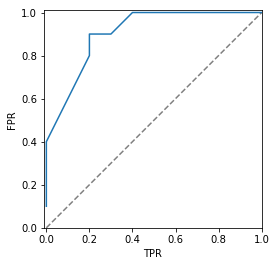

In [99]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_true, Y_pred)

gca().set_aspect('equal')
xlabel('TPR')
ylabel('FPR')
xlim([-0.01,1])
ylim([0,1.01])
plot([0,1],[0,1], ls='--', c='gray')
plot(fpr, tpr);

In [90]:
sklearn.metrics.roc_auc_score(Y_true, Y_pred)

0.90500000000000003

Если важно, чтобы классификатор возвращал как можно более точные значения вероятности принадлежности к классу, стоит оптимизировать $\mathtt{logloss} = -\frac1N\sum_{n=1}^N\ \bigg[y_n  \log \hat y_n + (1 - y_n)  \log (1 - \hat y_n)\bigg]$ ($y_n$ — реальность, $\hat y_n$ — предсказание вероятности).

In [100]:
sklearn.metrics.log_loss(Y_true, Y_pred)

0.39541168726698539

todo make_scorer

## Классификатор
todo
(KNN, RF, SGD, SVC) (predict_proba)
* dummy (DummyClassifier)
* neighbors (DistanceMetric, KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors)
    * картинку потому что 3 ваших соседа under age
* linear_model (ElasticNet, SGDClassifier, Lasso, LinearRegression, LogisticRegression, Ridge!)
* svm (LinearSVC, SVC)
* naive_bayes (GaussianNB, MultinomialNB)
* tree (DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, ExtraTreeClassifier)
* ensemble (RandomForestClassifier, RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor)
* xgboost, lightgbm, catboost

### Бустинг

Одним из наиболее успешных и универсальных алгоритмов машинного обучения является хорошо натюненный бустинг над деревьями. Помимо `sklearn` их реализацию содержат библиотеки `xgboost` от китайцев, `lightgbm` от MS и `CatBoost` от Яндекса, каждая со своими достоинствами.

todo

    xgboost (0.40)

    xgboost release 0.4
    Open project in xgboost/windows with Visual Studio 2013
    Visual Studio 2013, Release, x64
    Rebuild xgboost, xgboost_wrapper
    Copy all file in xgboost/windows/x64/Release folder to xgboost/wrapper
    Go to xgboost/python-package, run command python setup.py install


    xgboost-0.6
    git clone --recursive https://github.com/dmlc/xgboost в какую-нибудь папку
    cmake 3.5+, vs 2015 x64
    build libxgboost Release -> /lib/libxgboost.dll
    cd /python-package; python setup.py install


    CatBoost


    lightgbm https://github.com/Microsoft/LightGBM
        скачать, windows/LightGBM.sln DLL,x64 build
        python-package, python setup.py install
        https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.md

### Factorization machines

Factorization machines доступны в Python благодаря библиотеке `lightfm`. Пример использует датасет MovieLens, предразбитый на train и test. В нем одни и те же 943 юзеров оценивают некоторые из 1682 фильмов и нужно предсказать их оценки некоторым другим фильмам (проставленные в test).

todo что он и как предсказывает, и как осмысленно считать и трактовать качество http://lyst.github.io/lightfm/docs/lightfm.html

```
pip install lightfm
```

In [30]:
from lightfm import LightFM
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import precision_at_k

# Load the MovieLens 100k dataset. Only five star ratings are treated as positive.
data = fetch_movielens()

# Instantiate and train the model
model = LightFM(loss='warp')
model.fit(data['train'], epochs=30, num_threads=2)

# Evaluate the trained model
test_precision = precision_at_k(model, data['test'], k=5).mean()

In [79]:
indices = []
arr = data['test'].tocsr()
for i in range(943):
    for j in range(1682):
        if arr[i,j]:
            indices.append((i, j))

In [80]:
indices

[(0, 19),
 (0, 32),
 (0, 60),
 (0, 116),
 (0, 154),
 (0, 159),
 (0, 170),
 (0, 188),
 (0, 201),
 (0, 264),
 (1, 12),
 (1, 49),
 (1, 250),
 (1, 279),
 (1, 280),
 (1, 289),
 (1, 291),
 (1, 296),
 (1, 311),
 (1, 313),
 (2, 244),
 (2, 293),
 (2, 322),
 (2, 327),
 (2, 330),
 (2, 331),
 (2, 333),
 (2, 334),
 (2, 336),
 (2, 342),
 (3, 49),
 (3, 259),
 (3, 263),
 (3, 287),
 (3, 293),
 (3, 302),
 (3, 353),
 (3, 355),
 (3, 356),
 (3, 360),
 (4, 0),
 (4, 1),
 (4, 16),
 (4, 97),
 (4, 109),
 (4, 224),
 (4, 362),
 (4, 423),
 (4, 438),
 (4, 453),
 (5, 13),
 (5, 22),
 (5, 68),
 (5, 85),
 (5, 97),
 (5, 257),
 (5, 300),
 (5, 462),
 (5, 491),
 (5, 516),
 (6, 31),
 (6, 162),
 (6, 381),
 (6, 429),
 (6, 454),
 (6, 478),
 (6, 491),
 (6, 496),
 (6, 647),
 (6, 660),
 (7, 21),
 (7, 49),
 (7, 78),
 (7, 88),
 (7, 181),
 (7, 293),
 (7, 337),
 (7, 384),
 (7, 456),
 (7, 549),
 (8, 5),
 (8, 285),
 (8, 297),
 (8, 339),
 (8, 478),
 (8, 486),
 (8, 506),
 (8, 520),
 (8, 526),
 (8, 690),
 (9, 6),
 (9, 15),
 (9, 99),
 (9, 

In [78]:
data['test'].tocsr()[1,1]

0

In [62]:
len(data['test'].data)

9430

In [67]:
len(data['test'].tocsr().indices)

9430

In [85]:
userids, movieids = zip(*indices)

In [107]:
len(userids), len(movieids)

(9430, 9430)

In [89]:
model.predict(array(userids), array(movieids))

array([-6.99811459, -6.43219757, -7.19871473, ..., -4.63822937,
       -4.38094759, -5.96341372])

In [102]:
print data['test'].tocsr()[userids, movieids].tolist()[0]

[4, 4, 4, 3, 2, 4, 5, 3, 5, 4, 4, 5, 5, 3, 3, 3, 4, 4, 3, 1, 1, 2, 2, 5, 4, 1, 3, 1, 1, 3, 5, 4, 3, 4, 5, 5, 5, 3, 4, 5, 4, 3, 4, 3, 1, 2, 3, 1, 1, 1, 5, 4, 3, 3, 5, 2, 2, 4, 5, 4, 4, 4, 4, 3, 4, 4, 5, 4, 5, 5, 5, 5, 4, 4, 5, 3, 4, 1, 1, 3, 5, 5, 5, 4, 4, 5, 4, 4, 3, 5, 4, 4, 5, 3, 5, 3, 4, 5, 5, 5, 3, 3, 4, 3, 4, 3, 5, 3, 3, 4, 4, 4, 5, 5, 5, 4, 5, 4, 5, 5, 5, 4, 4, 3, 5, 4, 2, 4, 3, 2, 3, 3, 3, 5, 5, 4, 2, 4, 5, 5, 3, 2, 3, 3, 2, 1, 1, 4, 1, 1, 5, 5, 5, 2, 5, 5, 5, 5, 5, 1, 4, 3, 3, 3, 1, 4, 2, 2, 3, 3, 4, 4, 5, 4, 3, 5, 3, 5, 3, 3, 4, 4, 3, 4, 4, 2, 3, 5, 3, 3, 2, 4, 3, 2, 3, 3, 2, 1, 3, 4, 1, 4, 5, 2, 4, 1, 1, 5, 5, 1, 4, 4, 5, 3, 5, 3, 1, 5, 4, 1, 4, 4, 2, 5, 2, 4, 4, 4, 4, 3, 5, 3, 4, 5, 2, 4, 5, 5, 4, 5, 5, 5, 4, 4, 4, 4, 5, 4, 3, 5, 4, 3, 4, 2, 3, 3, 3, 2, 3, 3, 4, 4, 3, 4, 4, 2, 2, 3, 3, 2, 5, 4, 3, 5, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 2, 2, 3, 2, 2, 4, 4, 4, 4, 5, 2, 5, 3, 2, 3, 5, 4, 4, 4, 5, 5, 4, 5, 2, 5, 2, 3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 5, 4, 4, 4, 4, 3, 3, 5, 4, 2, 

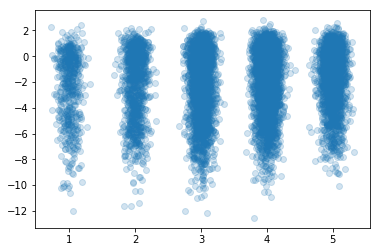

In [106]:
scatter(
    array(data['test'].tocsr()[userids, movieids].tolist()[0]) + randn(9430) * 0.1,
    model.predict(array(userids), array(movieids)),
    alpha=0.2
);

In [47]:
Counter((data['test'] * 10 + data['train']).toarray().ravel())

Counter({0.0: 1486126,
         1.0: 5568,
         2.0: 10375,
         3.0: 24721,
         4.0: 30858,
         5.0: 19048,
         10.0: 542,
         20.0: 995,
         30.0: 2424,
         40.0: 3316,
         50.0: 2153})

In [31]:
test_precision

0.12576883

In [32]:
data

{'item_feature_labels': array([u'Toy Story (1995)', u'GoldenEye (1995)', u'Four Rooms (1995)', ...,
        u'Sliding Doors (1998)', u'You So Crazy (1994)',
        u'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object),
 'item_features': <1682x1682 sparse matrix of type '<type 'numpy.float32'>'
 	with 1682 stored elements in Compressed Sparse Row format>,
 'item_labels': array([u'Toy Story (1995)', u'GoldenEye (1995)', u'Four Rooms (1995)', ...,
        u'Sliding Doors (1998)', u'You So Crazy (1994)',
        u'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object),
 'test': <943x1682 sparse matrix of type '<type 'numpy.int32'>'
 	with 9430 stored elements in COOrdinate format>,
 'train': <943x1682 sparse matrix of type '<type 'numpy.float32'>'
 	with 90570 stored elements in COOrdinate format>}

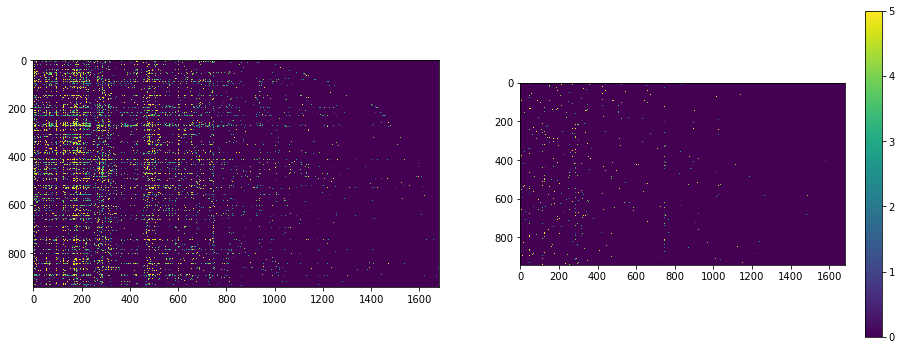

In [65]:
figure(figsize=(16,6))
subplot(121)
imshow(data['train'].toarray());
subplot(122)
imshow(data['test'].toarray());
colorbar();

In [16]:
len(data['item_labels'])

1682

In [36]:
Counter(data['item_features'].toarray().ravel())

Counter({0.0: 2827442, 1.0: 1682})

In [37]:
Counter(data['test'].toarray().ravel())

Counter({0: 1576696, 1: 542, 2: 995, 3: 2424, 4: 3316, 5: 2153})

In [38]:
Counter(data['train'].toarray().ravel())

Counter({0.0: 1495556,
         1.0: 5568,
         2.0: 10375,
         3.0: 24721,
         4.0: 30858,
         5.0: 19048})

## Регрессия
todo
* Качество регрессии: mean_absolute_error, mean_squared_error, r2_score


## Временные ряды
todo
* scikit-timeseries

* metrics.pairwise (linear_kernel, polynomial_kernel, rbf_kernel)

## Калибровка
todo
* calibration (CalibratedClassifierCV)

## Кластеризация

Задача кластеризации возникает, когда классы объектов неизвестны (unsupervised learning), но телепатия говорит нам, что есть несколько сильно отличающихся по свойствам групп объектов. Для ее решения существует много методов, но наиболее популярны K-Means (тупой и прямолинейный) и DBSCAN (хитрый и долгий).

В качестве датасета используем избитый набор про морфологию трех видов ирисов.

In [103]:
dataset = sklearn.datasets.load_iris()

In [104]:
dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [105]:
dataset.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [107]:
X = dataset['data']

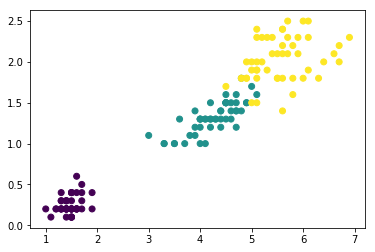

In [120]:
scatter(X[:,2], X[:,3], c=dataset['target']);

In [121]:
import sklearn.cluster

K-Means случайно выбирает центры `n_clusters` кластеров, а затем итеративно уточняет их положения, то относя точки к ближайшему центру, то смещая центр в их центр тяжести.

In [143]:
kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state=0)
components = kmeans.fit_predict(X)
kmeans.cluster_centers_

array([[ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.52916667,  3.05833333,  5.50833333,  2.1625    ],
       [ 5.53214286,  2.63571429,  3.96071429,  1.22857143],
       [ 7.475     ,  3.125     ,  6.3       ,  2.05      ],
       [ 6.24722222,  2.84722222,  4.775     ,  1.575     ]])

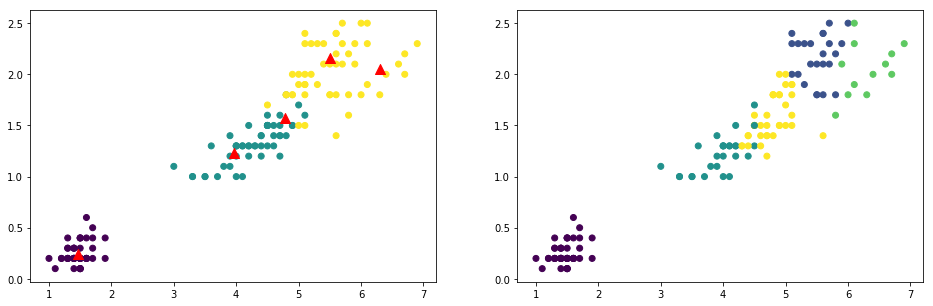

In [144]:
figure(figsize=(16,5))
subplot(121)
scatter(X[:,2], X[:,3], c=dataset['target']);
scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], marker='^', c='r', s=100);

subplot(122)
scatter(X[:,2], X[:,3], c=components);

K-Means примерно равномерно расположил центры кластеров по облаку точек, и за счет удачного выбора числа кластеров их номера примерно соответствуют реальным классам (показаны цветом на скаттере слева).

In [147]:
dbscan = sklearn.cluster.DBSCAN()
components = dbscan.fit_predict(X)

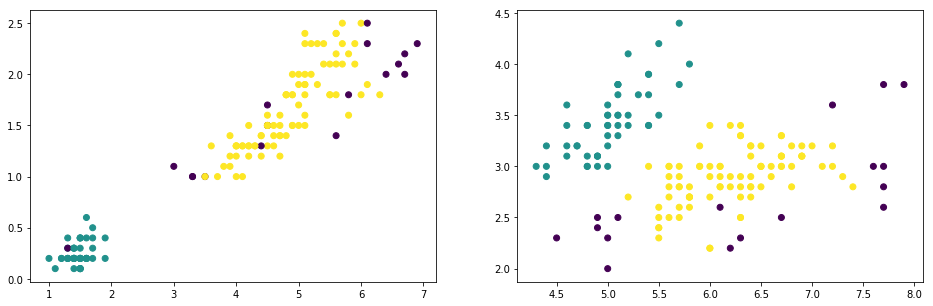

In [149]:
figure(figsize=(16,5))
subplot(121)
scatter(X[:,2], X[:,3], c=components);

subplot(122)
scatter(X[:,0], X[:,1], c=components);

DBSCAN больше полагается на близость соседних точек, чем на шарообразность облака, поэтому отнес к одному кластеру маленькое облако, к другому большое, а к третьему рассеянные точки на периферии большого облака.

## Качество кластеризации

Качество кластеризации можно оценивать, имея на руках настоящие метки классов или не имея.

https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/metrics/cluster/supervised.py

In [155]:
Y_true = [0,0,0,0,0, 0,1,1,1,1]
Y_pred = [1,1,1,2,2, 2,3,3,3,3]

In [156]:
sklearn.metrics.homogeneity_score(Y_true, Y_pred)

1.0

In [157]:
sklearn.metrics.completeness_score(Y_true, Y_pred)

0.61806564629215444

todo Понять, как считалось

Их среднее гармоническое — `v_measure_score`.

In [158]:
sklearn.metrics.v_measure_score(Y_true, Y_pred)

0.76395620623733063

todo adjusted_rand_score? Ward metric?

## Снижение размерности
todo
* decomposition (PCA, RandomizedPCA, TruncatedSVD, FastICA, NMF, LatentDirichletAllocation)
* manifold (Isomap, MDS, LocallyLinearEmbedding, TSNE)
* discriminant_analysis.LinearDiscriminantAnalysis
* discriminant_analysis.QuadraticDiscriminantAnalysis
* сети Кохонена

## Поиск аномалий
todo
* IsolationForest
* OneClassSVM

## Пайплайн
todo
* from skdata.base import SklearnClassifier
* base (BaseEstimator, ClassifierMixin, TransformerMixin)
* pipeline (FeatureUnion, Pipeline)

## Подбор гиперпараметров
todo
* feature_selection (RFECV)
* grid_search (GridSearchCV, RandomizedSearchCV)
* hyperopt

```
pip install git+git://github.com/hyperopt/hyperopt.git

hyperopt (0.0.3.dev0)

from hpsklearn import any_classifier, components
import hpsklearn.demo_support
from hpsklearn.components import svc, pca
from hpsklearn.estimator import HyperoptEstimatorFactory, hyperopt_estimator

from hyperopt import anneal, base, criteria, fmin, plotting, rand, tpe, hp, Trials, Domain, exceptions, space_eval, STATUS_FAIL, STATUS_OK
```

## Обработка естественного языка (NLP)

todo

https://habr.com/company/mailru/blog/358736/

    nltk, bigARTM, gensim, artm
        import nltk.classify.util
        from nltk import bigrams, trigrams
        from nltk.classify import NaiveBayesClassifier
        from nltk.collocations import BigramCollocationFinder
        from nltk.corpus import brown, conll2000, movie_reviews, names, stopwords
        from nltk.metrics.scores import precision, recall
        from nltk.probability import FreqDist, KneserNeyProbDist
        from nltk.stem.porter import PorterStemmer
        from nltk.tokenize import word_tokenize

        pip install gensim

        from gensim import corpora, models, similarities
        from gensim.corpora import WikiCorpus
        from gensim.models.word2vec import Word2Vec

        pymorphy2 Morphological analyzer (POS tagger + inflection engine) for Russian language


In [5]:
import inflect
engine = inflect.engine()
print engine.plural('ass')
print engine.number_to_words(11345)

asses
eleven thousand, three hundred and forty-five


Делает запросы к api.wordnik.com

In [14]:
from vocabulary.vocabulary import Vocabulary
import json

In [41]:
Vocabulary.synonym('fire', format='list')

[u'hit',
 u'dismiss',
 u'give forth',
 u'sack',
 u'break wind',
 u'lay off',
 u'discharge',
 u'emit']

In [31]:
from nltk.corpus import wordnet

In [39]:
for syn in wordnet.synsets('fire'):
    print syn.name(), ':',
    for lemma in syn.lemmas():
        print lemma.name(),
    print

fire.n.01 : fire
fire.n.02 : fire firing
fire.n.03 : fire flame flaming
fire.n.04 : fire
fire.n.05 : fire
ardor.n.03 : ardor ardour fervor fervour fervency fire fervidness
fire.n.07 : fire
fire.n.08 : fire
fire.n.09 : fire attack flak flack blast
open_fire.v.01 : open_fire fire
fire.v.02 : fire discharge
fire.v.03 : fire
displace.v.03 : displace fire give_notice can dismiss give_the_axe send_away sack force_out give_the_sack terminate
fire.v.05 : fire discharge go_off
fire.v.06 : fire
arouse.v.01 : arouse elicit enkindle kindle evoke fire raise provoke
burn.v.01 : burn fire burn_down
fuel.v.02 : fuel fire


In [42]:
Vocabulary.antonym('fire', format='list')

[u'hire']

In [43]:
Vocabulary.hyphenation('innocence', format='list')

[[u'in', u'stress'], u'no', u'cence']

In [48]:
Vocabulary.pronunciation('acceptance', format='dict')

{0: {u'raw': u'(\u0103k-s\u0115p\u02c8t\u0259ns)', u'rawType': u'ahd-legacy'},
 1: {u'raw': u'AE0 K S EH1 P T AH0 N S', u'rawType': u'arpabet'},
 2: {u'raw': u'AH0 K S EH1 P T AH0 N S', u'rawType': u'arpabet'}}

In [50]:
print Vocabulary.pronunciation('acceptance', format='dict')[0]['raw']

(ăk-sĕpˈtəns)


In [51]:
Vocabulary.meaning('lasagne', format='list')

[u'very wide flat strips of pasta',
 u'baked dish of layers of lasagna pasta with sauce and cheese and meat or vegetables',
 u'Variant of lasagna',
 u'<i>Synonym of [i]lasagna</i>[/i]',
 u'<i>plural of [i]lasagna</i>[/i]']

In [57]:
Vocabulary.part_of_speech('according', format='dict')

{0: {'example': u'Present participle of accord.', 'text': u'verb'},
 1: {'example': u'Agreeing; in agreement or harmony; harmonious.',
  'text': u'adjective'}}

In [56]:
for res in Vocabulary.translate('unbelievable', 'en', 'ru', format='list'):
    print res

невероятный
неправдоподобный
неимоверный
невероятно


```
pip install pymorphy2
```

In [8]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()
for p in morph.parse(u'защищающихся'):
    print p
    print p.normal_form

Parse(word=u'\u0437\u0430\u0449\u0438\u0449\u0430\u044e\u0449\u0438\u0445\u0441\u044f', tag=OpencorporaTag('PRTF,impf,intr,pres,actv plur,gent'), normal_form=u'\u0437\u0430\u0449\u0438\u0449\u0430\u0442\u044c\u0441\u044f', score=0.3333333333333333, methods_stack=((<DictionaryAnalyzer>, u'\u0437\u0430\u0449\u0438\u0449\u0430\u044e\u0449\u0438\u0445\u0441\u044f', 224, 34),))
защищаться
Parse(word=u'\u0437\u0430\u0449\u0438\u0449\u0430\u044e\u0449\u0438\u0445\u0441\u044f', tag=OpencorporaTag('PRTF,impf,intr,pres,actv anim,plur,accs'), normal_form=u'\u0437\u0430\u0449\u0438\u0449\u0430\u0442\u044c\u0441\u044f', score=0.3333333333333333, methods_stack=((<DictionaryAnalyzer>, u'\u0437\u0430\u0449\u0438\u0449\u0430\u044e\u0449\u0438\u0445\u0441\u044f', 224, 36),))
защищаться
Parse(word=u'\u0437\u0430\u0449\u0438\u0449\u0430\u044e\u0449\u0438\u0445\u0441\u044f', tag=OpencorporaTag('PRTF,impf,intr,pres,actv plur,loct'), normal_form=u'\u0437\u0430\u0449\u0438\u0449\u0430\u0442\u044c\u0441\u044f'

todo POS-tagging

In [ ]:
p.tag.POS == 'NOUN'

In [17]:
text = u'''
Явились даже опасные мечтатели. Руководимые не столько разумом, сколько движениями
благодарного сердца, они утверждали, что при новом градоначальнике процветет торговля,
и что, под наблюдением квартальных надзирателей, возникнут науки и искусства.
Не удержались и от сравнений. Вспомнили только что выехавшего из города старого градоначальника,
и находили, что хотя он тоже был красавчик и умница, но что, за всем тем, новому правителю
уже по тому одному должно быть отдано преимущество, что он новый. Одним словом, при этом случае,
как и при других подобных, вполне выразились: и обычная глуповская восторженность,
и обычное глуповское легкомыслие.'''
for w in text.split():
    print '|'.join(set(pymorphy2.MorphAnalyzer().normal_forms(w))),

явиться даже опасный мечтатели. руководимый не столько разумом, сколько движение благодарный|благодарное сердца, они утверждали, что пря|при|переть новый|новое градоначальник процвести торговля, и|исполняющий что, под наблюдение квартальный надзирателей, возникнуть наука и|исполняющий искусства. не удержаться и|исполняющий от сравнений. вспомнить только что выехать из|иза город старое|старый градоначальника, и|исполняющий находили, что хотя|хотеть он тоже быть красавчик и|исполняющий умница, но что, за весь тем, новый|новое правитель уже|узкий|уж по тома|тот|том один должно|должный быть отдать преимущество, что он новый. один словом, пря|при|переть это|этот случае, как и|исполняющий пря|при|переть другой подобных, вполне выразились: и|исполняющий обычный глуповский восторженность, и|исполняющий обычный глуповское|глуповский легкомыслие.


### Перевод

Враппером над онлайн-сервисом перевода может послужить библиотека `yandex-translater`. Для ее использования нужно получить бесплатный ключ по адресу https://translate.yandex.com/developers/keys . Перевод ограничен 1кк символами в день и 10кк в месяц.

todo Еще есть https://github.com/matheuss/google-translate-api/blob/master/index.js

```
pip install yandex-translater
```

In [5]:
import os, locale
from ultra import file_get
locale.setlocale(locale.LC_ALL, '')
os.environ['HTTPS_PROXY'] = 'socks5h://127.0.0.1:9050'

In [1]:
text = '''
— А что, отец, — спросил молодой человек, затянувшись, — невесты у вас в городе есть? Старик дворник ничуть не удивился.
— Кому и кобыла невеста, — ответил он, охотно ввязываясь в разговор.
— Больше вопросов не имею, — быстро проговорил молодой человек.
'''

In [6]:
from yandex import Translater
tr = Translater(
    key=file_get('yandex-translater-key.txt'),
    text=text,
    from_lang='ru', to_lang='en')
print tr.translate()


— And what, father, ' asked the young man, inhaled, bride in your city have? The old man janitor I was not surprised.
— To whom and Mare bride, he answered, willingly engaging in conversation.
— I have no more questions, young man said.



## Нейронные сети

Если данные для машинного обучения имеют ярко выраженную пространственную зависимость между соседними элементами, как, например, пиксели в изображении, интенсивности звука в аудио или буквы в тексте, хорошие результаты могут показать нейронные сети. Поскольку задачи с такими данными достаточно хорошо (но дорого) решаются и людьми, а еще потому, что вычисления для тренировки этого алгоритма машинного обучения хорошо и быстро проводятся на современных GPU, область переживает свой расцвет (2017).

### GPGPU и CUDA

На видеокартах от nVidia произвольные вычисления (General-purpose computing on GPU) возможны с использованием библиотеки и тулсета CUDA. Для ее использования установите https://developer.nvidia.com/cuda-downloads?target_os=Windows&target_arch=x86_64&target_version=7&target_type=exelocal (1.5 ГБ).

Затем следует воспользоваться библиотекой-враппером `pycuda`. Документация https://documen.tician.de/pycuda/ . Она позволяет немного удобнее писать на C++ (на самом деле сильно урезанном диалекте CUDA C, который компилируется программой `nvcc` из библиотеки CUDA) вычислительные ядра.

Архитектура GPU включает в себя иерархию вычислительных блоков и доступных им блоков памяти; она заточена под быстрое умножение матриц, но даже это делать на ней очень неудобно и требует заката байтиков по вычислительным блокам вручную.

Примеры https://docs.nvidia.com/cuda/cuda-samples/index.html

```
В консоли VC++2008 for Python:
pip install pycuda --global-option build_ext --global-option --compiler=msvc
```

In [1]:
import pycuda.driver
import pycuda.compiler

import numpy

pycuda.driver.init()

ndevices = pycuda.driver.Device.count()
print ndevices, 'устройств доступно'
for i in range(ndevices):
    dev = pycuda.driver.Device(i)
    print i, ':', dev.name()
    print '\tcompute capability version:', dev.compute_capability()
    print '\ttotal memory:', dev.total_memory()
    print '\tattributes:', dev.get_attributes()

1 устройств доступно
0 : GeForce GTX 1060
	compute capability version: (6, 1)
	total memory: 6442450944
	attributes: {pycuda._driver.device_attribute.MAX_THREADS_PER_BLOCK: 1024, pycuda._driver.device_attribute.MAX_BLOCK_DIM_X: 1024, pycuda._driver.device_attribute.MAX_BLOCK_DIM_Y: 1024, pycuda._driver.device_attribute.MAX_BLOCK_DIM_Z: 64, pycuda._driver.device_attribute.MAX_GRID_DIM_X: 2147483647, pycuda._driver.device_attribute.MAX_GRID_DIM_Y: 65535, pycuda._driver.device_attribute.MAX_GRID_DIM_Z: 65535, pycuda._driver.device_attribute.MAX_SHARED_MEMORY_PER_BLOCK: 49152, pycuda._driver.device_attribute.TOTAL_CONSTANT_MEMORY: 65536, pycuda._driver.device_attribute.WARP_SIZE: 32, pycuda._driver.device_attribute.MAX_PITCH: 2147483647, pycuda._driver.device_attribute.MAX_REGISTERS_PER_BLOCK: 65536, pycuda._driver.device_attribute.CLOCK_RATE: 1670500, pycuda._driver.device_attribute.TEXTURE_ALIGNMENT: 512, pycuda._driver.device_attribute.GPU_OVERLAP: 1, pycuda._driver.device_attribute.MUL

Shader Processors : Texture mapping units : Render output units = 1280:80:48

In [2]:
def get_cuda_cores_count(dev):
    mpc = dev.get_attribute(pycuda.driver.device_attribute.MULTIPROCESSOR_COUNT)
    major, minor = dev.compute_capability()
    if major == 2: # Fermi
        return mpc * 48 if minor == 1 else mpc * 32
    if major == 3: # Kepler
        return mpc * 192
    if major == 5: # Maxwell
        return mpc * 128
    if major == 6: # Pascal
        if minor == 1:
            return mpc * 128
        elif minor == 0:
            return mpc * 64

In [3]:
get_cuda_cores_count(dev)

1280

In [7]:
dev = pycuda.driver.Device(0)
ctx = dev.make_context()

In [59]:
mod = pycuda.compiler.SourceModule("""
__global__ void brute_md5(char *out)
{
  const int tid = blockIdx.x * blockDim.x + threadIdx.x;
  if (tid % 2 == 0) {
      out[tid] = tid;
  }
}
""")

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: UserWarning: The CUDA compiler succeeded, but said the following:
kernel.cu



In [33]:
mod = pycuda.compiler.SourceModule(
"""
#define UINT4 uint
#define uint unsigned int
//#include <stdio.h>
//#include <cuda.h>
""" +
md5_code + 
"""
__device__ unsigned long long int finished = 0;

__constant__ char hex[] = "0123456789abcdef";

__device__ void print_int(char *out, int val, int len)
{
    for (int i = 0; i < len; ++i) {
        out[len - 1 - i] = '0' + val % 10;
        val /= 10;
    }
}

__global__ void brute_md5(char *out)
{
    int tid = 0;
        blockIdx.x * gridDim.y * gridDim.z * blockDim.x +
        blockIdx.y * gridDim.z * blockDim.x +
        blockIdx.z * blockDim.x +
        threadIdx.x;
    int val = tid;

    char buff[64] = {0};
    int len = 10;
    print_int(buff, val, len);
    buff[len] = 0x80;
    buff[56] = len * 8;
    
    union {
        uint outi[4];
        char bytes[16];
    } hash;
    md5((uint *) &buff[0], hash.outi);

    int foo = 42;

    char outhex[32];
    for (int i = 0; i < 16; ++i) {
        outhex[2 * i + 0] = hash.bytes[i] / 16;
        outhex[2 * i + 1] = hash.bytes[i] % 0xF;
    }
    
    int digits = 0, es = 0;
    for (int i = 0; i < 32; ++i) {
        digits += outhex[i] <= 9;
        es += outhex[i] == 14;
    }

    if (1 || digits + es == 32 && es <= 1) {
        unsigned long long int old = atomicCAS(&finished, 0, 1);

        if (!old) {

            for (int i = 0; i < len; ++i) {
                out[i] = buff[i];
            }

            for (int i = 0; i < 32; ++i) {
                out[16 + i] = outhex[i]; //hex[outhex[i]];
            }

        }
    }
}


""")

C:\Users\User\Anaconda2\lib\site-packages\ipykernel\__main__.py:75: UserWarning: The CUDA compiler succeeded, but said the following:
kernel.cu
kernel.cu(159): warning: expression has no effect

kernel.cu(177): warning: variable "foo" was declared but never referenced




In [34]:
brute_md5 = mod.get_function("brute_md5")

result = numpy.zeros((48), numpy.uint8)
brute_md5(pycuda.driver.Out(result), grid=(100,100,100), block=(1000,1,1), time_kernel=True)

0.8010001182556152

In [35]:
''.join(map(chr, result))

'0000000000\x00\x00\x00\x00\x00\x00\x00\x00\xfc\xf3\x00\x08\xfc\xf7\xfb\xfb\x07\x07\x01\r\xff\xf8\x04\x0c\xfe\xfa\xfa\x00\xfa\xf9\x04\x02\x07\x07\xfa\xfb\xfc\xf8'

In [18]:
''.join(map(chr, result)).encode('hex')

'303035303030303433330000000000003930303433363639333834333131353036373632346534363432373038313530'

In [25]:
md5('0' * 10)

'f1b708bba17f1ce948dc979f4d7092bc'

In [21]:
md5('0050000433')

'091b0c9c4a21b0f51ed4a56da277b705'

In [261]:
md5('0123456789')

'781e5e245d69b566979b86e28d23f2c7'

In [266]:
md5('0879049425')

'781e5e242089f7e1692c684d7ad5418e'

In [203]:
md5('00464') == 'fcf2cbb450285857bdfdf61a71ff4d67'

True

In [163]:
md5('00063')

'8da131d0e5a369d7bbbc9d41a5728a47'

In [127]:
md5('\0' * 5)

'ca9c491ac66b2c62500882e93f3719a8'

In [157]:
md5('\0')

'93b885adfe0da089cdf634904fd59f71'

In [158]:
md5('?')

'd1457b72c3fb323a2671125aef3eab5d'

In [117]:
''.join(map(chr, result[:16])).encode('hex')

'dc271beef3243c93a5c11b3fadf4ac36'

In [104]:
md5('')

'd41d8cd98f00b204e9800998ecf8427e'

In [108]:
md5('0')

'cfcd208495d565ef66e7dff9f98764da'

In [89]:
ord('0')

48

In [88]:
md5('00000')

'dcddb75469b4b4875094e14561e573d8'

In [20]:
from ultra import md5

In [31]:
md5('12345')

'827ccb0eea8a706c4c34a16891f84e7b'

In [5]:
md5_code = """
/* F, G and H are basic MD5 functions: selection, majority, parity */

#define F(x, y, z) (((x) & (y)) | ((~x) & (z)))
#define G(x, y, z) (((x) & (z)) | ((y) & (~z)))
#define H(x, y, z) ((x) ^ (y) ^ (z))
#define I(x, y, z) ((y) ^ ((x) | (~z))) 

/* ROTATE_LEFT rotates x left n bits */
#define ROTATE_LEFT(x, n) (((x) << (n)) | ((x) >> (32-(n))))

/* FF, GG, HH, and II transformations for rounds 1, 2, 3, and 4 */
/* Rotation is separate from addition to prevent recomputation */
#define FF(a, b, c, d, x, s, ac) \
  {(a) += F ((b), (c), (d)) + (x) + (UINT4)(ac); \
   (a) = ROTATE_LEFT ((a), (s)); \
   (a) += (b); \
  }

#define GG(a, b, c, d, x, s, ac) \
  {(a) += G ((b), (c), (d)) + (x) + (UINT4)(ac); \
   (a) = ROTATE_LEFT ((a), (s)); \
   (a) += (b); \
  }

#define HH(a, b, c, d, x, s, ac) \
  {(a) += H ((b), (c), (d)) + (x) + (UINT4)(ac); \
   (a) = ROTATE_LEFT ((a), (s)); \
   (a) += (b); \
  }

#define II(a, b, c, d, x, s, ac) \
  {(a) += I ((b), (c), (d)) + (x) + (UINT4)(ac); \
   (a) = ROTATE_LEFT ((a), (s)); \
   (a) += (b); \
  }


__device__ void md5(uint *in, uint *hash) {

  uint a, b, c, d;
  
  const uint a0 = 0x67452301;
  const uint b0 = 0xEFCDAB89;
  const uint c0 = 0x98BADCFE;
  const uint d0 = 0x10325476;

  a = a0;
  b = b0;
  c = c0;
  d = d0;

  /* Round 1 */
#define S11 7
#define S12 12
#define S13 17
#define S14 22
  FF ( a, b, c, d, in[ 0], S11, 3614090360); /* 1 */
  FF ( d, a, b, c, in[ 1], S12, 3905402710); /* 2 */
  FF ( c, d, a, b, in[ 2], S13,  606105819); /* 3 */
  FF ( b, c, d, a, in[ 3], S14, 3250441966); /* 4 */
  FF ( a, b, c, d, in[ 4], S11, 4118548399); /* 5 */
  FF ( d, a, b, c, in[ 5], S12, 1200080426); /* 6 */
  FF ( c, d, a, b, in[ 6], S13, 2821735955); /* 7 */
  FF ( b, c, d, a, in[ 7], S14, 4249261313); /* 8 */
  FF ( a, b, c, d, in[ 8], S11, 1770035416); /* 9 */
  FF ( d, a, b, c, in[ 9], S12, 2336552879); /* 10 */
  FF ( c, d, a, b, in[10], S13, 4294925233); /* 11 */
  FF ( b, c, d, a, in[11], S14, 2304563134); /* 12 */
  FF ( a, b, c, d, in[12], S11, 1804603682); /* 13 */
  FF ( d, a, b, c, in[13], S12, 4254626195); /* 14 */
  FF ( c, d, a, b, in[14], S13, 2792965006); /* 15 */
  FF ( b, c, d, a, in[15], S14, 1236535329); /* 16 */

  /* Round 2 */
#define S21 5
#define S22 9
#define S23 14
#define S24 20
  GG ( a, b, c, d, in[ 1], S21, 4129170786); /* 17 */
  GG ( d, a, b, c, in[ 6], S22, 3225465664); /* 18 */
  GG ( c, d, a, b, in[11], S23,  643717713); /* 19 */
  GG ( b, c, d, a, in[ 0], S24, 3921069994); /* 20 */
  GG ( a, b, c, d, in[ 5], S21, 3593408605); /* 21 */
  GG ( d, a, b, c, in[10], S22,   38016083); /* 22 */
  GG ( c, d, a, b, in[15], S23, 3634488961); /* 23 */
  GG ( b, c, d, a, in[ 4], S24, 3889429448); /* 24 */
  GG ( a, b, c, d, in[ 9], S21,  568446438); /* 25 */
  GG ( d, a, b, c, in[14], S22, 3275163606); /* 26 */
  GG ( c, d, a, b, in[ 3], S23, 4107603335); /* 27 */
  GG ( b, c, d, a, in[ 8], S24, 1163531501); /* 28 */
  GG ( a, b, c, d, in[13], S21, 2850285829); /* 29 */
  GG ( d, a, b, c, in[ 2], S22, 4243563512); /* 30 */
  GG ( c, d, a, b, in[ 7], S23, 1735328473); /* 31 */
  GG ( b, c, d, a, in[12], S24, 2368359562); /* 32 */

  /* Round 3 */
#define S31 4
#define S32 11
#define S33 16
#define S34 23
  HH ( a, b, c, d, in[ 5], S31, 4294588738); /* 33 */
  HH ( d, a, b, c, in[ 8], S32, 2272392833); /* 34 */
  HH ( c, d, a, b, in[11], S33, 1839030562); /* 35 */
  HH ( b, c, d, a, in[14], S34, 4259657740); /* 36 */
  HH ( a, b, c, d, in[ 1], S31, 2763975236); /* 37 */
  HH ( d, a, b, c, in[ 4], S32, 1272893353); /* 38 */
  HH ( c, d, a, b, in[ 7], S33, 4139469664); /* 39 */
  HH ( b, c, d, a, in[10], S34, 3200236656); /* 40 */
  HH ( a, b, c, d, in[13], S31,  681279174); /* 41 */
  HH ( d, a, b, c, in[ 0], S32, 3936430074); /* 42 */
  HH ( c, d, a, b, in[ 3], S33, 3572445317); /* 43 */
  HH ( b, c, d, a, in[ 6], S34,   76029189); /* 44 */
  HH ( a, b, c, d, in[ 9], S31, 3654602809); /* 45 */
  HH ( d, a, b, c, in[12], S32, 3873151461); /* 46 */
  HH ( c, d, a, b, in[15], S33,  530742520); /* 47 */
  HH ( b, c, d, a, in[ 2], S34, 3299628645); /* 48 */

  /* Round 4 */
#define S41 6
#define S42 10
#define S43 15
#define S44 21
  II ( a, b, c, d, in[ 0], S41, 4096336452); /* 49 */
  II ( d, a, b, c, in[ 7], S42, 1126891415); /* 50 */
  II ( c, d, a, b, in[14], S43, 2878612391); /* 51 */
  II ( b, c, d, a, in[ 5], S44, 4237533241); /* 52 */
  II ( a, b, c, d, in[12], S41, 1700485571); /* 53 */
  II ( d, a, b, c, in[ 3], S42, 2399980690); /* 54 */
  II ( c, d, a, b, in[10], S43, 4293915773); /* 55 */
  II ( b, c, d, a, in[ 1], S44, 2240044497); /* 56 */
  II ( a, b, c, d, in[ 8], S41, 1873313359); /* 57 */
  II ( d, a, b, c, in[15], S42, 4264355552); /* 58 */
  II ( c, d, a, b, in[ 6], S43, 2734768916); /* 59 */
  II ( b, c, d, a, in[13], S44, 1309151649); /* 60 */
  II ( a, b, c, d, in[ 4], S41, 4149444226); /* 61 */
  II ( d, a, b, c, in[11], S42, 3174756917); /* 62 */
  II ( c, d, a, b, in[ 2], S43,  718787259); /* 63 */
  II ( b, c, d, a, in[ 9], S44, 3951481745); /* 64 */

  a += a0;
  b += b0;
  c += c0;
  d += d0;
  
  hash[0] = a;
  hash[1] = b;
  hash[2] = c;
  hash[3] = d;
  
  return;
}
"""

In [21]:
mod = pycuda.compiler.SourceModule("""
__global__ void multiply_them(float *dest, float *a, float *b)
{
  const int i = threadIdx.x;
  dest[i] = a[i] * b[i];
}
""")

multiply_them = mod.get_function("multiply_them")

a = numpy.random.randn(400).astype(numpy.float32)
b = numpy.random.randn(400).astype(numpy.float32)

dest = numpy.zeros_like(a)
multiply_them(pycuda.driver.Out(dest), pycuda.driver.In(a), pycuda.driver.In(b), block=(400,1,1))

print numpy.allclose(dest, a*b)

1 устройств доступно
0 : GeForce GTX 1060
	compute capability version: (6, 1)
	total memory: 6442450944
	attributes: {pycuda._driver.device_attribute.MAX_THREADS_PER_BLOCK: 1024, pycuda._driver.device_attribute.MAX_BLOCK_DIM_X: 1024, pycuda._driver.device_attribute.MAX_BLOCK_DIM_Y: 1024, pycuda._driver.device_attribute.MAX_BLOCK_DIM_Z: 64, pycuda._driver.device_attribute.MAX_GRID_DIM_X: 2147483647, pycuda._driver.device_attribute.MAX_GRID_DIM_Y: 65535, pycuda._driver.device_attribute.MAX_GRID_DIM_Z: 65535, pycuda._driver.device_attribute.MAX_SHARED_MEMORY_PER_BLOCK: 49152, pycuda._driver.device_attribute.TOTAL_CONSTANT_MEMORY: 65536, pycuda._driver.device_attribute.WARP_SIZE: 32, pycuda._driver.device_attribute.MAX_PITCH: 2147483647, pycuda._driver.device_attribute.MAX_REGISTERS_PER_BLOCK: 65536, pycuda._driver.device_attribute.CLOCK_RATE: 1670500, pycuda._driver.device_attribute.TEXTURE_ALIGNMENT: 512, pycuda._driver.device_attribute.GPU_OVERLAP: 1, pycuda._driver.device_attribute.MUL

todo распознавание лиц, объектов, сегментация, распознавание речи, ImageNet

* Тензорная операция, нелинейность, sigmoid, ReLU, обратное распространение ошибки по слоям
* Фреймворк DL, параллелизация на GPU, автодифференцирование
* Кирпичи conv, maxpool, dropout, batchnorm
* Дообучение, расписание обучения, NAG, ADAM
* Репозитории с претренированными моделями, AlexNet, VGG, ResNet
* CNN, R-CNN, artistic style transfer
* Генерация батчей: шум, аффинные трансформации
* autoencoder, word2vec
* GAN
* LSTM, RNN

todo Deep learning

    CUDA 9.0 требует Visual Studio 2017
    CuDNN https://developer.nvidia.com/cudnn
   	надо ли? в Path:
	c:\Program Files (x86)\Microsoft Visual Studio\2017\Enterprise\VC\Tools\MSVC\14.10.25017\bin\HostX64\x64\

	pycuda? или OpenCL
    pytorch? tensorflow?

Tensorflow это Ким Кардашьян машинного обучения.

todo

    Theano (0.8.0)
    Lasagne (0.2.dev1)
    pip install --upgrade https://github.com/Theano/Theano/archive/master.zip
    pip install --upgrade https://github.com/Lasagne/Lasagne/archive/master.zip

    conda install mingw libpython
    pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git
        убедиться, чтобы он вызывал для компиляции свой, mingwшный gcc (x64, 4.7.0)
            иначе может быть sorry, unimplemented: 64-bit mode not compiled in
        если Theano не скомпилит, что ему там нужно, выдаст Can not import gof

    Добавить системную переменную окружения THEANO_FLAGS со значением “floatX=float32,device=gpu,nvcc.fastmath=True”
    Using gpu device 0: GeForce GT 540M (CNMeM is disabled, CuDNN not available)
        CNMeM (a faster CUDA memory allocator) -- стоит использовать
    theano.config.device должен вывести gpu
    Можно os.environ.update({'THEANO_FLAGS': '...'})

    theano.printing.pydotprint(f, outfile="f.png", var_with_name_simple=True)

todo

    [под админом] pip install protobuf
    скачать https://github.com/Microsoft/caffe и следовать инструкциям по установке
    /windows/CommonSettings.props.example -> /windows/CommonSettings.props
        <UseCuDNN>false</UseCuDNN>
        <PythonSupport>true</PythonSupport>
        <CudaArchitecture>compute_20,sm_20</CudaArchitecture>
        <PythonDir>c:\Users\User\Anaconda2</PythonDir>
    открыть /windows/Caffe.sln в VS 2013 и сбилдить
    скопировать /Build/x64/Release/pycaffe/caffe/ -> c:\Users\User\Anaconda2\Lib\site-packages\caffe\
    переименовать папку со скачанным caffe-master, иначе тот почему там начинает искать файлы

todo Составить табличку зоопарков Theano, Keras, Lasagne, Caffe, Torch, Tensorflow, CNTK, еще?

todo 

    CNTK
    https://docs.microsoft.com/en-us/cognitive-toolkit/setup-windows-python?tabs=cntkpy22
    https://docs.microsoft.com/en-us/cognitive-toolkit/using-cntk-with-keras
    
    pip install cntk-gpu

todo

    Keras (0.3.2)
        https://github.com/fchollet/hualos Keras Total Visualization project
    pip install keras
        from keras.datasets import mnist, boston_housing, cifar10, imdb
        from keras.layers.convolutional import Convolution2D, MaxPooling2D
        from keras.layers.core import Dense, Activation, Dropout, Flatten, TimeDistributedDense
        from keras.layers.embeddings import Embedding
        from keras.layers.recurrent import LSTM, SimpleRNN
        from keras.models import Graph, Sequential
        from keras.optimizers import SGD, Adam
        from keras.utils import np_utils

In [ ]:
from keras.model import Sequential
from keras.layers import Dense

data = random((1000,100))
labels = randint(2, size=(1000,1))

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100, kernel_initializer='uniform'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(data, labels, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, Y_test))
predictions = model.predict(data)

In [ ]:
keras.preprocessing.sequence.pad_sequences(x_train, maxlen=80)
keras.utils.to_categorical(y_train, num_classes)
Dropout(0.2)
activatoin='softmax'
Conv2D(32, (3,3), padding='same', input_shape=...)
Activation('relu')
MaxPooling2D(pool_size=(2,2))
Flatten()

Embedding(20000, 128)
LSTM(128, dropout=0.2, recurrent_dropout=0.2)

optimizer='adam'
optimizer=keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
loss='mse'

In [ ]:
model.output_shape
model.summary()
model.get_config()
model.get_weights()
model.save('model.h5')
model = keras.models.load_model('model.h5')

model.evaluate(X_test, Y_test, batch_size=32)
model.predict_classes(X_test, batch_size=32)

In [ ]:
model.fit(..., callbacks=[keras.callbacks.EarlyStopping(patience=2)])

todo

    LSH lshash
    sklearn:
        multiclass (OneVsRestClassifier)
        neural_network
        utils (resample)
        
todo обучение с подкреплением UCB1

todo sentiment analysis?

todo метод отжига

todo

    rpy2, R.arima

    statsmodel, minepy (http://minepy.sourceforge.net/docs/1.0.0/install.html) -- для MIC, "корреляции 21-го века"
        import statsmodels.graphics.mosaicplot
        from statsmodels.tsa.arima_model import ARIMA